In [153]:
import praw
import pandas as pd


res = pd.DataFrame(columns=['upvotes'])

r = praw.Reddit(user_agent='7lmDUQvP11kI4DFMMacoOmW6oBs')
subreddit = r.get_subreddit('dataisbeautiful')
submissions = subreddit.get_top_from_all(limit=10000)
for x in submissions:

    
    comments_list = []
    forest_comments = x.comments
    flat_comments = praw.helpers.flatten_tree(forest_comments)
    for fc in flat_comments:
        try:
            comments_list.append(fc.body)
        except:
            pass
    data_dict = {'upvotes': x.ups,
                'id': x.id,
                'author': x.author,
                'created_utc': x.created_utc,
                'title': x.title,
                'comments': comments_list}
    res = res.append(data_dict, ignore_index=True)
    print(x.title)
print(res)


TV finales that surprise/disappoint [OC]
Wore my Fitbit heart rate monitor during sex. Beautiful. [OC]
Loss of life visualized from WW2
1933 to 2100 USA Age Distribution [OC]
Plot millions of journal entries from 18th and 19th century ship logs, and you reveal a picture of ocean trade you've never seen before.
Technology has created more jobs than it has destroyed, says 140 years of data
Google Trends - "Reddit Alternative"
USA vs Japan Age-Specific Fertility Rates 1947-2010 [OC]
Heart rate (bpm) during marriage proposal [OC]
30 most edited regular Wikipedia pages [OC]
How USA Age-Specific Fertility Rates have changed from 1933 to 2010 [OC]
I bought a wireless phone charger. Concerned about reports of overheating, I decided to log the temperature and compare it to a regular USB3.0 charger. [OC]
Bernie Sanders has officially caught up with Obama's 2007 numbers [OC]
At what age do members of the opposite sex look best to men and women
The world uses 68% less land to produce the same quan

NotFound: 

In [154]:
x.title

'See how screwed you are if a nuclear bomb hits your city!'

In [155]:
res.head()

,upvotes,author,comments,created_utc,id,title
0,6735,ChallengeResponse,[Fuckin' Dexter...\n\nEDIT: I feel like a lot...,1439982417,3hkjsz,TV finales that surprise/disappoint [OC]
1,6637,noveltysin,"[This is like abstract pornography. , Someone ...",1439272281,3gk6un,Wore my Fitbit heart rate monitor during sex. ...
2,6557,M_Go_Blue,[that red soviet deaths bar that just kept goi...,1433005363,37v0ne,Loss of life visualized from WW2
3,6248,StephenHolzman,[I’m excited to have finally found the time to...,1439128088,3gckpr,1933 to 2100 USA Age Distribution [OC]
4,5963,1point618,"[A more modern map, for comparison:\n\nhttp://...",1388720701,1ua9d8,Plot millions of journal entries from 18th and...


In [156]:
res.to_csv('dataisbeautiful_df.csv', index_label=False)

In [157]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [158]:
%%R

library(tm)
library(SnowballC)
library(ggplot2)

In [159]:
%%R



df <- read.csv('dataisbeautiful_df.csv', stringsAsFactors=FALSE)

str(df)

'data.frame':	1000 obs. of  6 variables:
 $ upvotes    : num  6735 6637 6557 6248 5963 ...
 $ author     : chr  "ChallengeResponse" "noveltysin" "M_Go_Blue" "StephenHolzman" ...
 $ comments   : chr  "['Fuckin\\' Dexter...\\n\\nEDIT:  I feel like a lot of people are missing one of the fundamental things about the shit show tha"| __truncated__ "['This is like abstract pornography. ', 'Someone out there is jerking to this graph', \"They should wear a Fitbit while they're"| __truncated__ "['that red soviet deaths bar that just kept going. what a great visualization of how devastating the european theatre was.', 'W"| __truncated__ "['I’m excited to have finally found the time to put this visualization I’ve had in my mind for a while together! You’re looking"| __truncated__ ...
 $ created_utc: num  1.44e+09 1.44e+09 1.43e+09 1.44e+09 1.39e+09 ...
 $ id         : chr  "3hkjsz" "3gk6un" "37v0ne" "3gckpr" ...
 $ title      : chr  "TV finales that surprise/disappoint [OC]" "Wore my Fitbit heart 

In [160]:
%%R

summary(df)

    upvotes        author            comments          created_utc       
 Min.   : 863   Length:1000        Length:1000        Min.   :1.343e+09  
 1st Qu.:1286   Class :character   Class :character   1st Qu.:1.392e+09  
 Median :1930   Mode  :character   Mode  :character   Median :1.411e+09  
 Mean   :2197                                         Mean   :1.408e+09  
 3rd Qu.:2832                                         3rd Qu.:1.426e+09  
 Max.   :6735                                         Max.   :1.444e+09  
      id               title          
 Length:1000        Length:1000       
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      


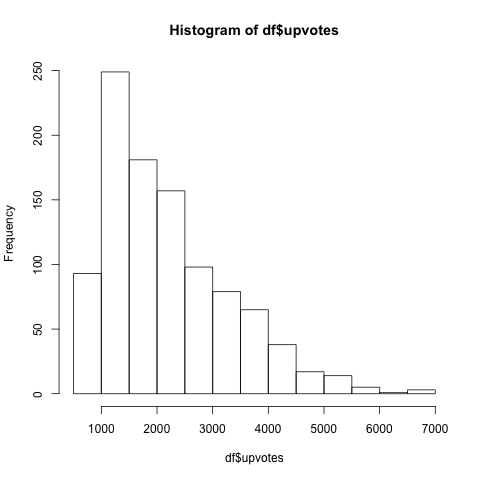

In [161]:
%%R

hist(df$upvotes)

In [162]:
%%R

#Create the Corpus

df.corpus <- Corpus(VectorSource(df$title)) 
df.corpus[[1]]

#convert to lowercase, then remove punctuation, then remove stopwords

df.corpus <- tm_map(df.corpus, content_transformer(tolower))
df.corpus <- tm_map(df.corpus, content_transformer(removePunctuation))
df.corpus <- tm_map(df.corpus, content_transformer(removeWords), stopwords('english'))



In [163]:
%%R

#stem words
df.corpus <- tm_map(df.corpus, stemDocument)
df.corpus[[1]]

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 31


In [164]:
%%R
#Bag of words

df.frequencies <- TermDocumentMatrix(df.corpus)
df.sparse <- removeSparseTerms(df.frequencies, 0.985)
#Keep terms that appear in 2% or more of the posts

df.sparse

<<TermDocumentMatrix (terms: 45, documents: 1000)>>
Non-/sparse entries: 1235/43765
Sparsity           : 97%
Maximal term length: 9
Weighting          : term frequency (tf)


In [165]:
%%R
df.sparse <- as.data.frame(as.matrix(df.sparse))
df.sparse

          1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
age       0 0 0 1 0 0 0 0 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
american  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
averag    0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
citi      0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
colleg    0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
comment   0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
compar    0 0 0 0 0 0 0 0 0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0
countri   0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
data      0 0 0 0 0 1 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
day       0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
death     0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
distribut 0 0 0 1 0 0 0 0 0  0  0  0  0  0  0  0  0 

In [166]:
%%R
#Make column names appropriate for R
#colnames(df.sparse) <- make.names(colnames(df.sparse))
df.sparse <- as.data.frame(t(df.sparse))
summary(df.sparse)

      age           american         averag           citi          colleg     
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.00   Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.00   1st Qu.:0.000  
 Median :0.000   Median :0.000   Median :0.000   Median :0.00   Median :0.000  
 Mean   :0.027   Mean   :0.026   Mean   :0.029   Mean   :0.02   Mean   :0.021  
 3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.00   3rd Qu.:0.000  
 Max.   :1.000   Max.   :2.000   Max.   :2.000   Max.   :2.00   Max.   :1.000  
    comment          compar         countri           data      
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000  
 Median :0.000   Median :0.000   Median :0.000   Median :0.000  
 Mean   :0.024   Mean   :0.016   Mean   :0.048   Mean   :0.038  
 3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000  
 Max.   :1.000   Max.   :1.000   Max.   :2.000   M

In [167]:
%%R
df.sparse$upvotes <- df$upvotes

In [168]:
%%R

summary(df.sparse)

      age           american         averag           citi          colleg     
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.00   Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.00   1st Qu.:0.000  
 Median :0.000   Median :0.000   Median :0.000   Median :0.00   Median :0.000  
 Mean   :0.027   Mean   :0.026   Mean   :0.029   Mean   :0.02   Mean   :0.021  
 3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.00   3rd Qu.:0.000  
 Max.   :1.000   Max.   :2.000   Max.   :2.000   Max.   :2.00   Max.   :1.000  
    comment          compar         countri           data      
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000  
 Median :0.000   Median :0.000   Median :0.000   Median :0.000  
 Mean   :0.024   Mean   :0.016   Mean   :0.048   Mean   :0.038  
 3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000  
 Max.   :1.000   Max.   :1.000   Max.   :2.000   M

In [169]:
%%R
lm1 <- lm(upvotes~., data=df.sparse)
summary(lm1)


Call:
lm(formula = upvotes ~ ., data = df.sparse)

Residuals:
    Min      1Q  Median      3Q     Max 
-2004.6  -852.1  -235.8   613.7  4588.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2146.986     52.562  40.846  < 2e-16 ***
age          199.612    231.281   0.863  0.38831    
american     289.817    220.124   1.317  0.18829    
averag        97.928    202.766   0.483  0.62923    
citi         173.225    230.108   0.753  0.45176    
colleg        64.148    249.649   0.257  0.79727    
comment       27.416    234.720   0.117  0.90704    
compar       319.591    288.618   1.107  0.26844    
countri     -427.919    164.618  -2.599  0.00948 ** 
data         -14.798    177.484  -0.083  0.93357    
day          -45.349    193.483  -0.234  0.81474    
death        -51.698    268.992  -0.192  0.84763    
distribut    546.736    282.034   1.939  0.05285 .  
everi       -165.980    197.477  -0.841  0.40084    
facebook     -13.022    286.512  -0.045  0.96

In [173]:
%%R

lm2 <- step(lm1)

Start:  AIC=14071.88
upvotes ~ age + american + averag + citi + colleg + comment + 
    compar + countri + data + day + death + distribut + everi + 
    facebook + googl + last + like + live + look + map + men + 
    million + much + name + number + peopl + per + popul + popular + 
    rate + reddit + result + show + sinc + state + time + top + 
    unit + use + visual + women + word + world + xpost + year

            Df Sum of Sq        RSS   AIC
- much       1      1157 1178653649 14070
- facebook   1      2552 1178655044 14070
- result     1      4509 1178657001 14070
- state      1      8059 1178660551 14070
- data       1      8589 1178661081 14070
- look       1     13010 1178665502 14070
- comment    1     16856 1178669348 14070
- map        1     38747 1178691239 14070
- death      1     45636 1178698127 14070
- day        1     67872 1178720363 14070
- number     1     76650 1178729141 14070
- colleg     1     81574 1178734065 14070
- googl      1    100656 1178753147 14070
-

In [174]:
%%R

summary(lm2)


Call:
lm(formula = upvotes ~ american + countri + distribut + like + 
    peopl + rate + reddit + visual + world + xpost, data = df.sparse)

Residuals:
    Min      1Q  Median      3Q     Max 
-1865.9  -864.1  -263.6   601.4  4542.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2192.56      40.82  53.710  < 2e-16 ***
american      332.40     210.95   1.576  0.11541    
countri      -450.03     160.14  -2.810  0.00505 ** 
distribut     548.38     269.72   2.033  0.04231 *  
like         -353.59     243.32  -1.453  0.14649    
peopl         352.69     195.11   1.808  0.07096 .  
rate          265.13     173.57   1.528  0.12695    
reddit        304.87     187.32   1.628  0.10394    
visual        296.07     198.29   1.493  0.13573    
world        -215.42     143.71  -1.499  0.13420    
xpost        -346.55     192.48  -1.800  0.07210 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1100 on 989 degrees o